In [1]:
import pandas as pd
import seaborn as sns
import pandasql as psql
import numpy as np
import matplotlib.pyplot as plt
from dython.nominal import identify_nominal_columns
from scipy import stats
from scipy.stats import chisquare
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, MinMaxScaler
import mca
import prince

In [10]:
survey = pd.read_csv('original_data/survey.csv')

C:\Users\Eren\AppData\Local\Temp/ipykernel_24544/1872705409.py:1: DtypeWarning: Columns (314,391,392,789,791,792,1124,1125,1227,1228,1231,1232,1477,1478,1554,1555,1556,1557,1558,1559,1561,1568,1571,1678,1687,1745,1746,1818,1836,1837,1843,1844,1849,1851,1852,1853,2072,2116,2117,2264,2266,2280,2281,2282,2283,2289,2290,2483,2484,2501,2502,2508,2509,2699,2711,2712,2830) have mixed types. Specify dtype option on import or set low_memory=False.
  survey = pd.read_csv('original_data/survey.csv')


In [9]:
# survey.drop(['yrmomborn_1'], axis=1, inplace=True)
# survey.drop(['SRQE_RAI_1'], axis=1, inplace=True)
# survey.drop(['selsa_rom_1'], axis=1, inplace=True)
# survey.drop(['selsa_fam_1'], axis=1, inplace=True)
# survey.drop(['selsa_soc_1'], axis=1, inplace=True)

,egoid,Tier,StudyStatus,RegionUS,US,StartDate_1,EndDate_1,gender_1,hs_1,hssex_1,...,gpa_fa2017,gpa_fa2018,gpa_sp2019,gpa_su2019,reshallyear1,reshallyear2,liveoffcampusyear3,reshallyear3,liveoffcampusyear4,reshallyear4
0,44869,Tier 1,In Study,South Atlantic,US address,05aug2015 17:25:30,05aug2015 19:09:07,Female,Public school,A mixture of boys and girls,...,3.513,NaN,NaN,NaN,299.0,299.0,On Campus,299.0,NaN,NaN
1,43516,Tier 1,In Study,Pacific,US address,10aug2015 18:26:07,10aug2015 19:27:45,Female,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,283.0,283.0,On Campus,283.0,NaN,NaN
2,89411,Tier 3,In Study,Pacific,US address,NaN,NaN,Female,Private independent college-prep school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,287.0,287.0,NaN,NaN,NaN,NaN
3,74285,Tier 3,In Study,West South Central,US address,NaN,NaN,Female,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,279.0,279.0,NaN,NaN,NaN,NaN
4,56527,Tier 3,In Study,Pacific,US address,NaN,NaN,Male,Private religious/parochial school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,105.0,105.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,48826,Tier 3,In Study,Pacific,US address,NaN,NaN,Male,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,139.0,NaN,Off Campus,NaN,NaN,NaN
718,11454,Tier 3,In Study,Mountain,US address,NaN,NaN,Male,Public school,A mixture of boys and girls,...,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN
719,93246,Tier 1,In Study,East North Central,US address,16aug2015 16:41:29,16aug2015 17:21:37,Male,Private religious/parochial school,Same sex- male,...,NaN,NaN,NaN,NaN,168.0,NaN,NaN,NaN,NaN,NaN
720,75341,Tier 2,In Study,NaN,Not US address,31oct2015 23:27:16,01nov2015 00:15:35,Female,Private religious/parochial school,Same sex- female,...,NaN,NaN,NaN,NaN,236.0,NaN,NaN,NaN,NaN,NaN


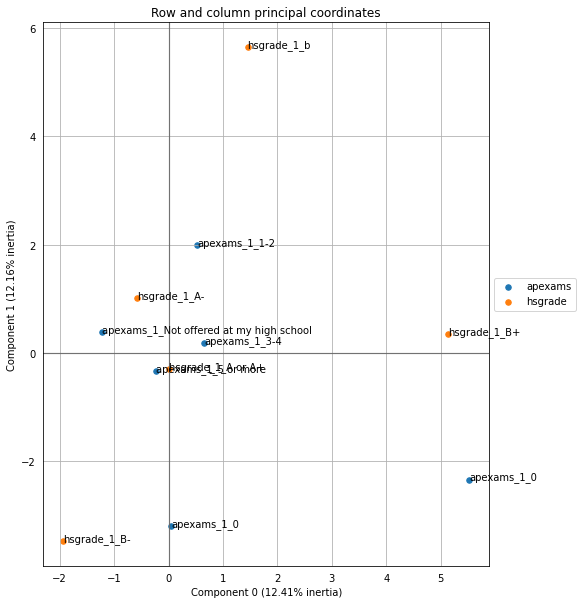

In [40]:
survey_temp = survey
survey_temp.replace([np.inf, -np.inf], np.nan, inplace=True)
survey_temp = survey_temp.fillna(0)
columns = survey_temp.columns

# for col in columns:
#     erase = False
#     for val in survey_temp[col].values:
#         try:
#             if val < 0:
#                 erase = True
#                 break
#         except:
#             pass
    
#     if erase:
#         survey_temp.drop(col, axis=1, inplace=True)

survey_temp = survey_temp[['apexams_1', 'hsgrade_1']]

prince_mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42
)
survey_mca = prince_mca.fit(survey_temp)

ax = survey_mca.plot_coordinates(
    X=survey_temp,
    ax=None,
    figsize=(8, 10),
    show_row_points=False,
    row_points_size=0,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=30,
    show_column_labels=True,
    legend_n_cols=1
).legend(loc='center left', bbox_to_anchor=(1, 0.5))